<a href="https://colab.research.google.com/github/SurajK7/ChestAI/blob/master/Cardiomegaly_U_Ones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
%reload_ext autoreload
%autoreload 2

In [0]:
from fastai.vision import *
from torchvision.models import *
from utils import create_dfs, create_data, print_val_score, chexpert_targets, u_one_features, u_zero_features
import pandas as pd
from pathlib import Path

In [0]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=14yeXGJ9TjAA-Gh7GvGQuYlV8h099ZufD' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=14yeXGJ9TjAA-Gh7GvGQuYlV8h099ZufD" -O CheXpert-v1.0-small.zip && rm -rf /tmp/cookies.txt

In [0]:
!unzip -qq CheXpert-v1.0-small.zip
!rm CheXpert-v1.0-small.zip

In [0]:
full_train_df, full_valid_df = create_dfs()
full_df = pd.concat([full_train_df, full_valid_df])

In [0]:
# function to create class labels
def feature_string(row):
  if row['Cardiomegaly'] in [-1, 1]:
      return 'Cardiomegaly'
  else:
    return ''

In [0]:
#adding class labels
full_df['feature_string'] = full_df.apply(feature_string,axis = 1).fillna('')

In [0]:
data = create_data(full_df, size=320, bs=56)

In [0]:
learn = cnn_learner(data, models.densenet121, pretrained=True)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-02
Min loss divided by 10: 1.45E-02


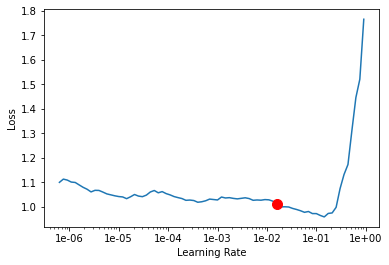

In [0]:
lr_find(learn)
learn.recorder.plot(suggestion=True)

In [0]:
lr = 1e-2

In [0]:
learn.fit_one_cycle(8, slice(lr), callbacks=[callbacks.SaveModelCallback(learn, every='epoch', name='co')])

In [0]:
print_val_score(learn, full_valid_df)

co_1


0.8366123925825418
co_0


0.8097014925373135
co_5


0.8049525101763908
co_3


0.8059701492537313
co_6


0.813545906829489
co_4


0.8248530076888285
co_2


0.7806422433288105
co_7


0.8218000904568069
